# EDA Analysis and Model

This notebook contains the EDA Analysis and a PCA - Clustering model to identify the sellers which are considered top performers but also those who are "in danger" to become low performers

In [1]:
## Importing required libraries for initial analysis. Pandas and Numpy for Dataframes creation and data manipulation. Matplotlib, Seaborn and Plotly for visualization and Datetime for Date data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime


In [2]:
## Loading dataset for analysis and dropping 

data = pd.read_csv('./Dataset.csv')
data = data.drop(['category_id'], axis=1)
data = data.drop_duplicates()
data['registration_date'] = data['registration_date'].str[:10]
data['registration_date'] = pd.to_datetime(data['registration_date'], format = "%Y-%m-%d")
data

,id,nickname,registration_date,tags,level,seller_status,canceled_orders,total_orders,claims,cancellations,negative_rating,neutral_rating,positive_rating,completed_sales,delayed_time
0,42485793,MOBILEK2011,2011-01-20,"['normal', 'eshop', 'messages_as_seller']",5_green,platinum,360,4329,0.0153,0.0063,0.02,0.02,0.96,1025,0.0197
1,160820235,BUILDER CO,2014-06-14,"['normal', 'mshops', 'messages_as_seller', 'es...",5_green,platinum,3750,103264,0.0035,0.0019,0.14,0.04,0.82,26428,0.0009
66,31508529,JAVMARINOMOLINA,2010-07-30,"['normal', 'eshop', 'mshops', 'messages_as_sel...",5_green,platinum,293,8103,0.0027,0.0034,0.04,0.03,0.93,1412,0.0071
74,305902091,IMCOVALLE SAS,2018-03-05,"['normal', 'eshop', 'mshops', 'messages_as_sel...",5_green,platinum,2233,27617,0.0155,0.0033,0.12,0.05,0.83,5255,0.0352
86,567921503,MLE4217677,2020-05-13,"['normal', 'messages_as_seller', 'eshop']",5_green,platinum,455,10372,0.0119,0.0005,0.07,0.03,0.90,1686,0.0112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126229,23832163,NHVIVAS,2010-02-13,"['normal', 'mshops', 'messages_as_seller']",5_green,NaN,4,48,0.0000,0.0208,0.01,0.00,0.99,44,0.0714
126230,58226416,EGECOL SAS,2011-06-06,"['normal', 'mshops', 'messages_as_seller', 'es...",5_green,NaN,11,202,0.0099,0.0049,0.05,0.03,0.92,191,0.0326
126231,229013484,JUANANDRESMONTENEGRORETAVIZC,2016-09-20,"['normal', 'messages_as_seller']",5_green,NaN,16,287,0.0090,0.0000,0.00,0.00,1.00,102,0.0943
126232,512969649,AINCRADSTORE,2020-01-11,"['normal', 'messages_as_seller', 'eshop']",4_light_green,NaN,3,24,0.0000,0.0000,0.00,0.04,0.96,21,0.0000


In [3]:
## Creating an EDA for the dataset

## based on the user's registration date we will create a "tenure" column

# Get the current date (assuming today's date)

current_date = datetime.today().strftime("%Y-%m-%d")

data['current_date'] = current_date
data['current_date'] = pd.to_datetime(data['current_date'], format = "%Y-%m-%d")
data['tenure_years'] = (data['current_date'] - data['registration_date']).dt.days
data['tenure_years'] = (data['tenure_years']/365).round(0)
data = data[['id', 'nickname', 'tenure_years','registration_date' ,'level', 'seller_status', 'canceled_orders', 'total_orders', 'claims', 'cancellations', 'negative_rating', 'neutral_rating', 'positive_rating', 'completed_sales', 'delayed_time']]
data.to_csv('C:/Users/migca/Desktop/data.csv')

data.describe()




,id,tenure_years,canceled_orders,total_orders,claims,cancellations,negative_rating,neutral_rating,positive_rating,completed_sales,delayed_time
count,6.363000e+03,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000
mean,6.247182e+08,6.149301,95.448373,2168.457960,0.006305,0.002898,0.076720,0.065977,0.601449,417.555713,0.020273
std,5.570865e+08,5.237283,264.271100,5329.855302,0.032415,0.026877,0.159631,0.214823,0.428375,987.096956,0.056961
min,1.743400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.721046e+08,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.270301e+08,5.000000,17.000000,391.000000,0.000000,0.000000,0.010000,0.000000,0.860000,138.000000,0.002100
75%,1.074874e+09,9.000000,84.000000,2038.000000,0.007300,0.001100,0.080000,0.030000,0.960000,404.000000,0.023500
max,1.718041e+09,24.000000,5029.000000,103264.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26428.000000,1.000000


In [4]:
## In Level Column, using map function, change the levels' name to numeric. Apply the same for seller_status
data['level'].fillna(0, inplace=True)
data['level'] = data['level'].map({'5_green':5,'4_light_green':4, '3_yellow':3, '2_orange':2,'1_red':1, 0:0})

data['seller_status'].fillna(0, inplace=True)
data['seller_status'] = data['seller_status'].map({'silver':1 , 'gold':2, 'platinum':3, 0:0})

## Tenure column created in 5 categories
range = [-float('inf'), 2, 5, 10, 15, float('inf')]
labels = ['1) 0-2 years', '2) 2-5 years', '3) 5-10 years', '4) 10-15 years', '5) 15+ years']
data['tenure_range'] = pd.cut(data['tenure_years'], bins=range, labels=labels)
data.insert(3, 'tenure_range', data.pop('tenure_range'))


C:\Users\migca\AppData\Local\Temp\ipykernel_7868\1638600244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'].fillna(0, inplace=True)
C:\Users\migca\AppData\Local\Temp\ipykernel_7868\1638600244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'] = data['level'].map({'5_green':5,'4_light_green':4, '3_yellow':3, '2_orange':2,'1_red':1, 0:0})
C:\Users\migca\AppData\Local\Temp\ipykernel_7868\1638600244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

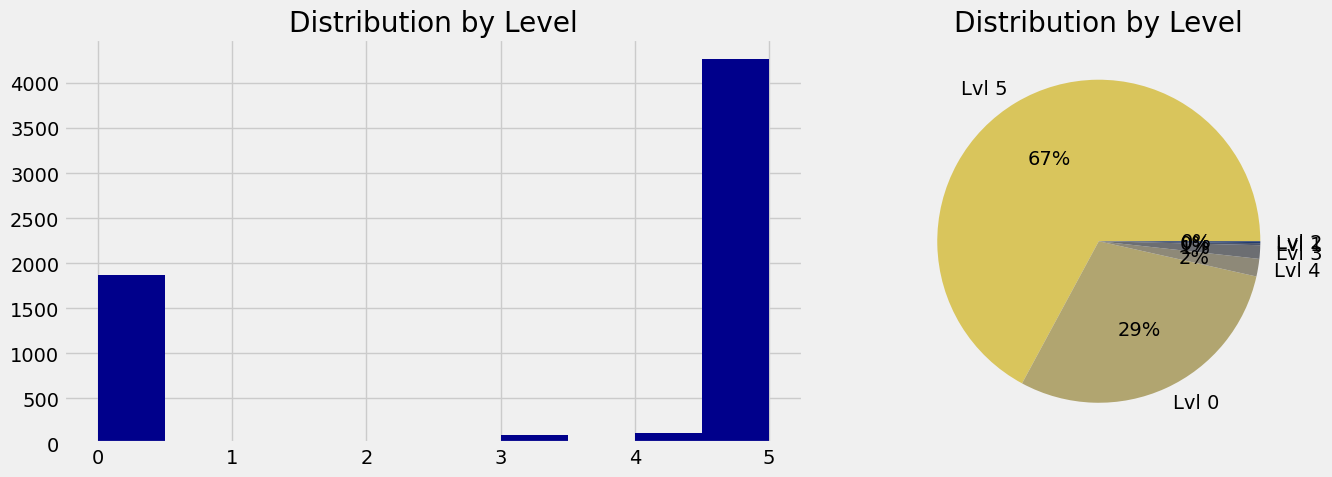

In [95]:
## Gráfica de tendencia entre el promedio de cancelaciones entre los 5 niveles y el nivel 5 - Mercado líder

plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('cividis_r')
ax[0].hist(x=data['level'],color='darkblue')
ax[0].set_title("Distribution by Level")
ax[1].pie(data['level'].value_counts(),autopct='%1.f%%',colors=palette_color, labels = ['Lvl 5', 'Lvl 0', 'Lvl 4','Lvl 3', 'Lvl 1', 'Lvl 2'])
ax[1].set_title("Distribution by Level")
plt.tight_layout()

## Gráfica de pie para saber cuantas cancelaciones hay en cada nivel

In [86]:
df_lvl5 = data.copy()

df_lvl5 = df_lvl5[df_lvl5['level']==5]

plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('GnBu')
ax[0].hist(x=df_lvl5['seller_status'],color='darkblue')
ax[0].set_title("Distribution by Status Across Level 5")
ax[1].pie(df_lvl5['seller_status'].value_counts(),autopct='%1.f%%',colors=palette_color, labels=['No Level', 'Silver', 'Gold', 'Platinum'])
ax[1].set_title("Distribution by Status Across Level 5")
plt.tight_layout()


,id,nickname,tenure_years,tenure_range,registration_date,level,seller_status,canceled_orders,total_orders,claims,cancellations,negative_rating,neutral_rating,positive_rating,completed_sales,delayed_time
0,42485793,MOBILEK2011,13.0,4) 10-15 years,2011-01-20,5,3,360,4329,0.0153,0.0063,0.02,0.02,0.96,1025,0.0197
1,160820235,BUILDER CO,10.0,3) 5-10 years,2014-06-14,5,3,3750,103264,0.0035,0.0019,0.14,0.04,0.82,26428,0.0009
66,31508529,JAVMARINOMOLINA,14.0,4) 10-15 years,2010-07-30,5,3,293,8103,0.0027,0.0034,0.04,0.03,0.93,1412,0.0071
74,305902091,IMCOVALLE SAS,6.0,3) 5-10 years,2018-03-05,5,3,2233,27617,0.0155,0.0033,0.12,0.05,0.83,5255,0.0352
86,567921503,MLE4217677,4.0,2) 2-5 years,2020-05-13,5,3,455,10372,0.0119,0.0005,0.07,0.03,0.90,1686,0.0112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126222,1413941364,YOYITO2204DYJTACTICAL,1.0,1) 0-2 years,2023-07-03,5,0,4,121,0.0000,0.0000,0.00,0.00,1.00,71,0.0000
126229,23832163,NHVIVAS,14.0,4) 10-15 years,2010-02-13,5,0,4,48,0.0000,0.0208,0.01,0.00,0.99,44,0.0714
126230,58226416,EGECOL SAS,13.0,4) 10-15 years,2011-06-06,5,0,11,202,0.0099,0.0049,0.05,0.03,0.92,191,0.0326
126231,229013484,JUANANDRESMONTENEGRORETAVIZC,7.0,3) 5-10 years,2016-09-20,5,0,16,287,0.0090,0.0000,0.00,0.00,1.00,102,0.0943


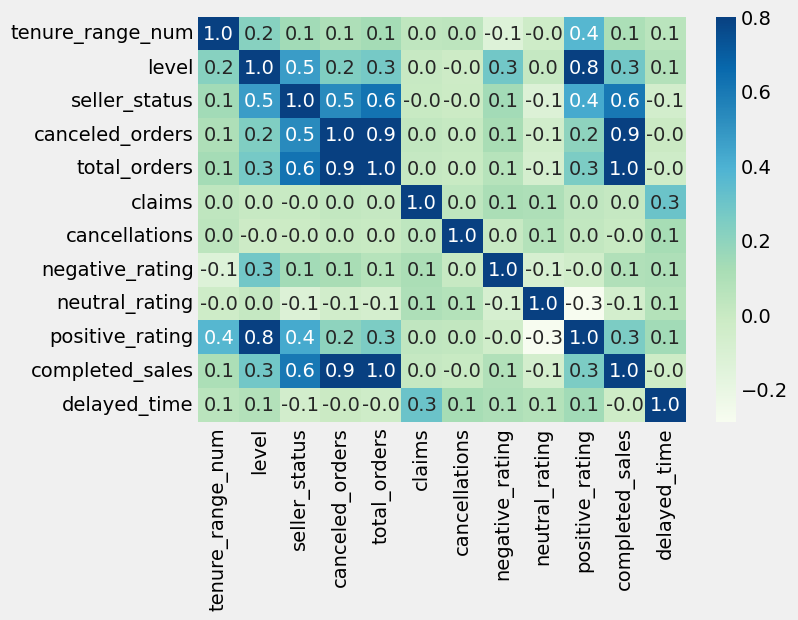

In [91]:
data['tenure_range_num'] = data['tenure_range'].map({'1) 0-2 years':1, '2) 2-5 years':2, '3) 5-10 years':3, '4) 10-15 years':4, '5) 15+ years':5})
data['tenure_range_num'] = pd.to_numeric(data['tenure_range_num'])
plt.figure(figsize=(7,5))
correlation= data[['tenure_range_num','level','seller_status','canceled_orders','total_orders','claims','cancellations','negative_rating','neutral_rating','positive_rating','completed_sales','delayed_time']].corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='GnBu',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

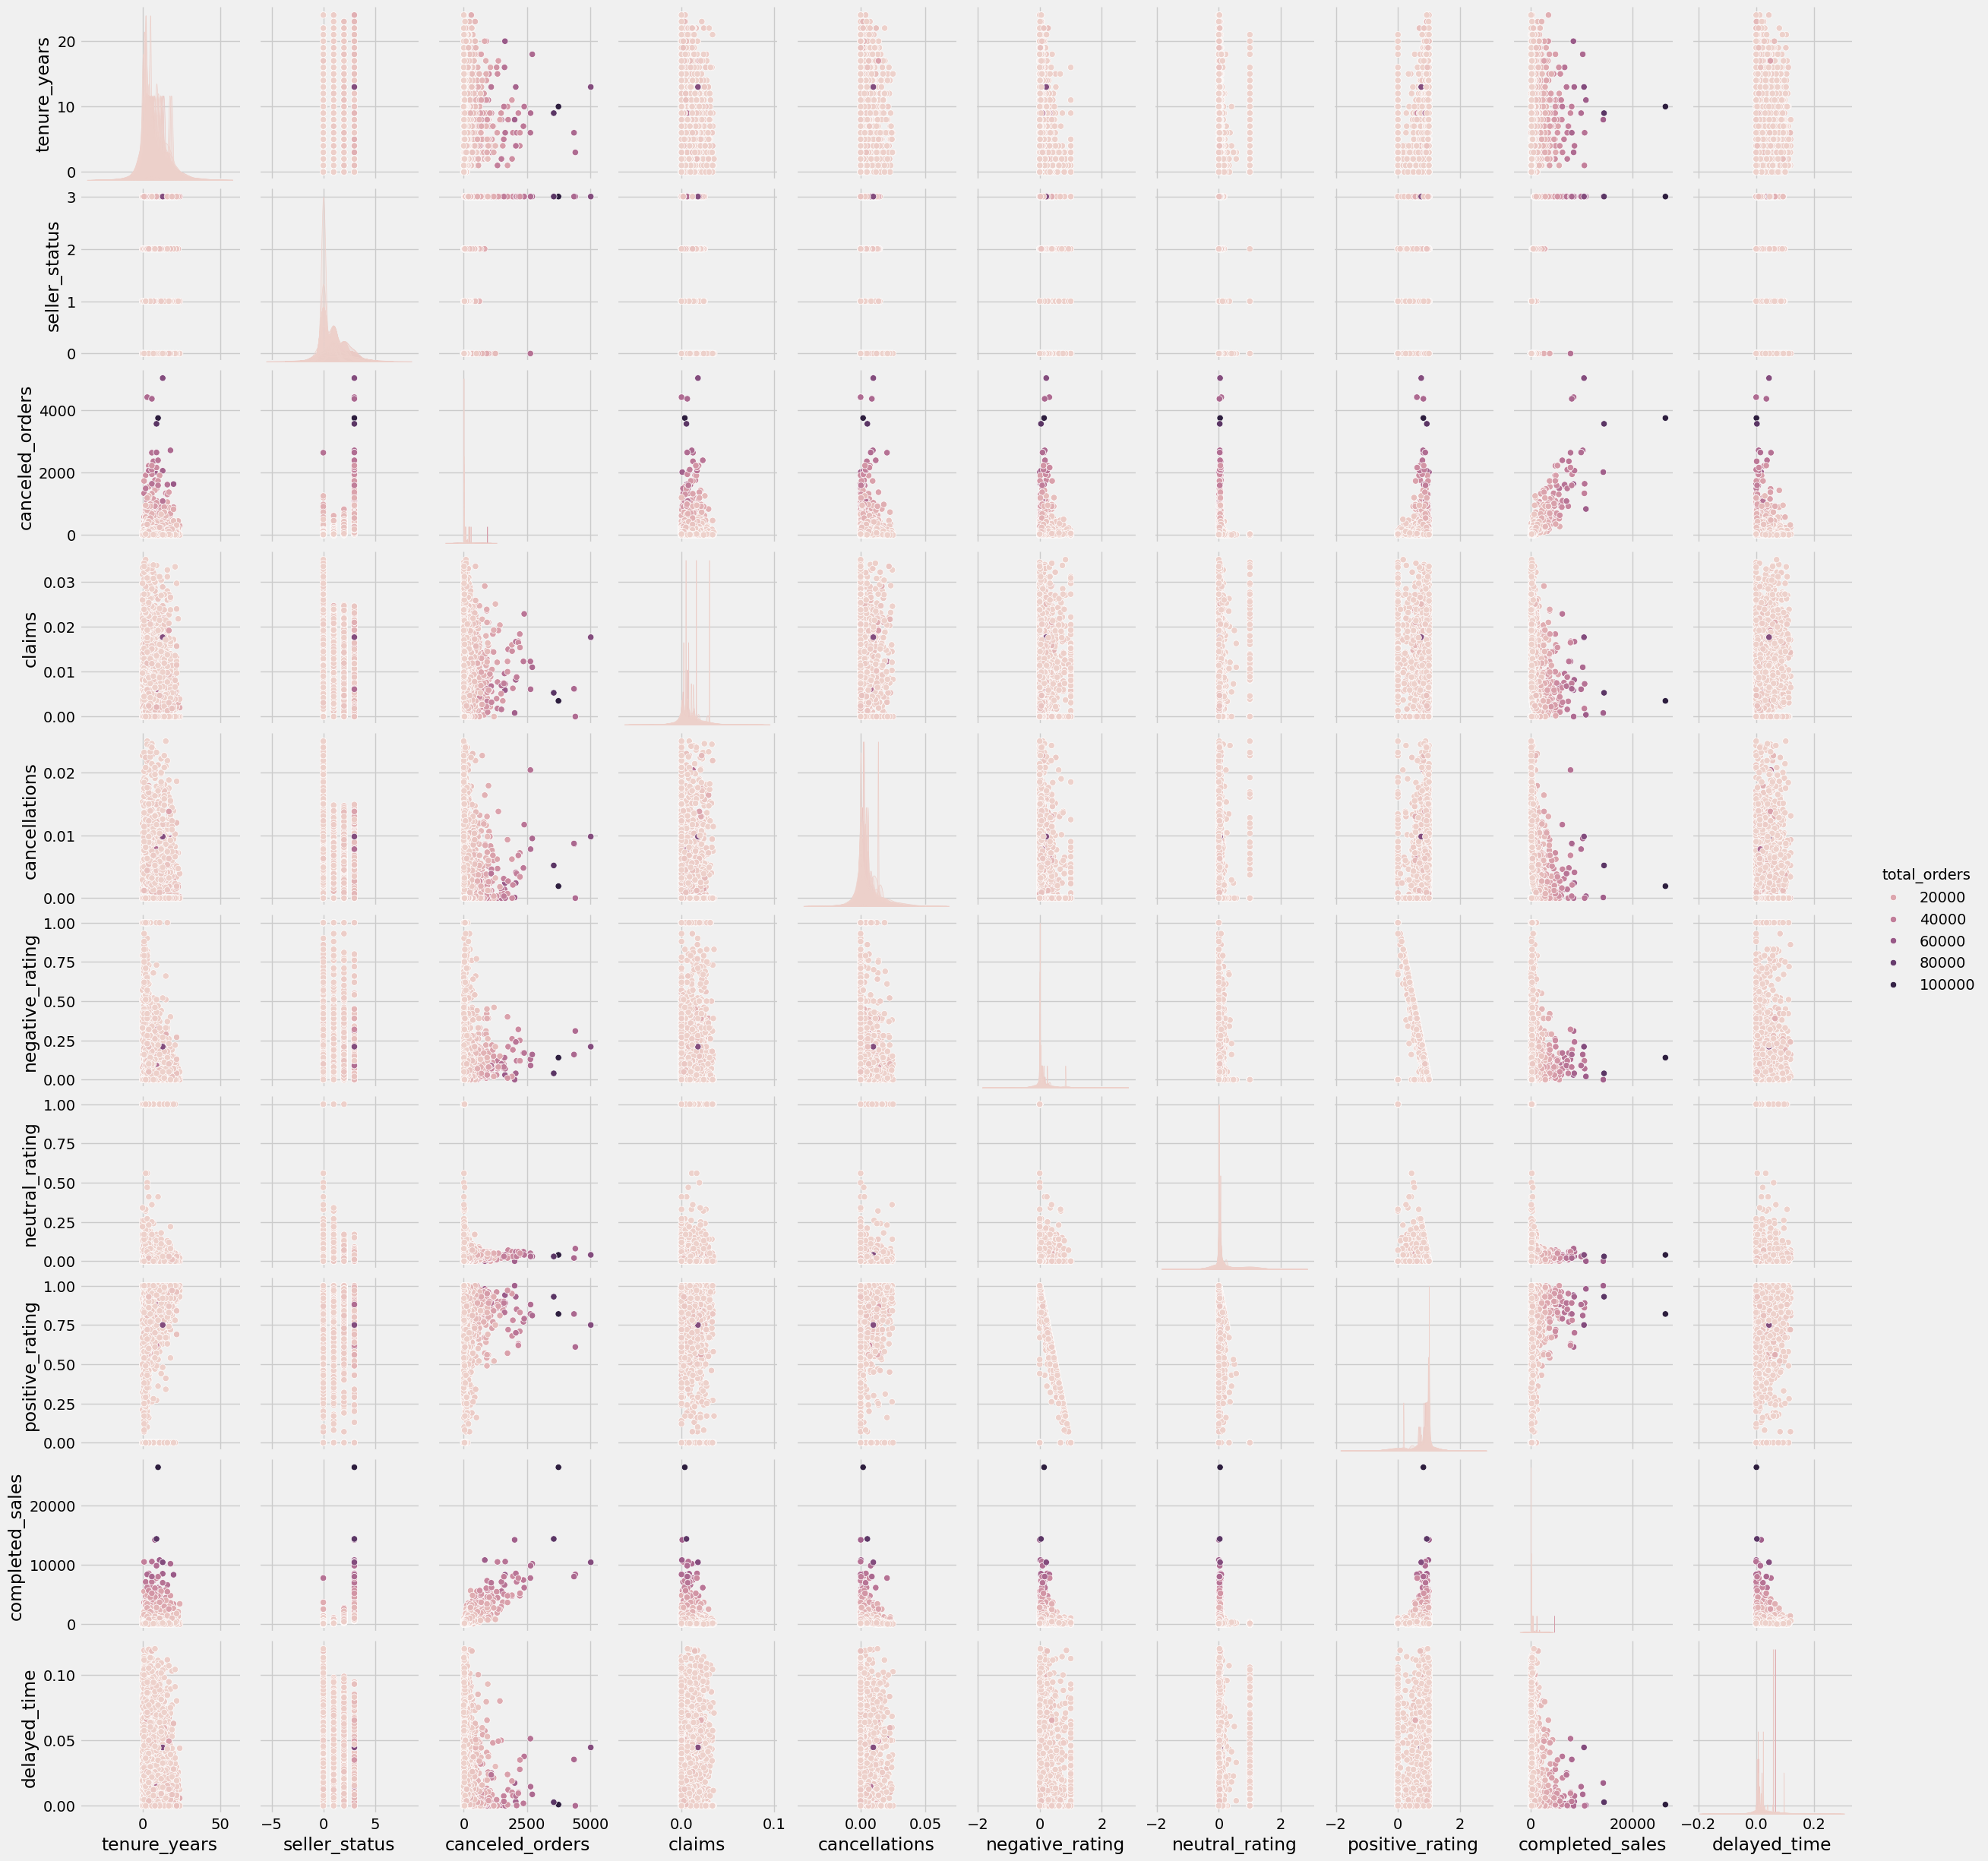

In [78]:
chart = df_lvl5[['tenure_years','seller_status','canceled_orders','total_orders','claims','cancellations','negative_rating','neutral_rating','positive_rating','completed_sales','delayed_time']]
plt.style.use("fivethirtyeight")
sns.pairplot(chart,hue='total_orders')

